## Linear Regression


Let's take a look at Linear Regression and its implementations in this notebook.

In [1]:
'''
If you are using Google Colab, uncomment the next line to download `utils_02.py`. 
'''
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_basic/week0_02_linear_reg/utils_02.py

--2024-07-22 13:32:47--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_basic/week0_02_linear_reg/utils_02.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 841 [text/plain]
Saving to: ‘utils_02.py.1’

utils_02.py.1       100%[===================>]     841  --.-KB/s    in 0s      

2024-07-22 13:32:47 (86.4 MB/s) - ‘utils_02.py.1’ saved [841/841]



In [40]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")   # ignoring the warnings that pop by

random_seed = 45   # given the same seed the computer will produce the same random number

matplotlib.rcParams.update({'font.size': 16})  # updating the font size for better visibility

Time to generate features matrix $X$ and correct weights vector $w_{true}$. Target vector (or matrix in general case) $Y$ is computed as  $X\mathbf{w}_{\text{true}}$ with gaussian noise:

In [41]:
# Creating a sample dataset for machine learning 
n_features = 2   # 2 features for each data set
n_objects = 300  # creating 300 data points in total
batch_size = 10   # for example if baking cookies, then only baking 10 cookies at a time (how many dataset at a  time)
num_steps = 43  # number of iterations to go through the data  (how many times entire process is repeated)
np.random.seed(random_seed+1)  # so the random part of weight is consistent

# Let it be the *true* weights vector
w_true = np.random.normal(size=(n_features, ))  
#  In a linear regression task, we want to learn the relationship between features (inputs) and the target (output). The true weights vector (w_true) represents the underlying relationship that we want our linear regression model to learn.  This line generates a vector (w_true) of true weights, with the length equal to the number of features (n_features), where each weight is drawn from a normal distribution (bell curve) with a mean of 0 and a standard deviation of 1.

X = np.random.uniform(-5, 5, (n_objects, n_features)) # 
""" This creates the input data for our linear regression task. The matrix X contains data points with multiple features, which are necessary for training the model. This line generates a matrix X with n_objects rows and n_features columns, where each value is randomly chosen from a uniform distribution between -5 and 5.

# For different scales of features. In case of 3 features the code is equal to the commented line below
"""

# X *= np.arange([1, 3, 5])[None, :]
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
"""
Scaling features introduces variability in their importance, which is common in real-world datasets where different features have different scales or units.
This line scales the features differently by multiplying each feature in X by a specific factor. The factor is determined by the array np.arange(n_features) * 2 + 1.

    np.arange(n_features) generates an array [0, 1] for n_features = 2.
    Multiplying by 2 and adding 1 results in [1, 3].
    np.newaxis reshapes it to [[1, 3]], making it compatible for element-wise multiplication.
"""

# Here comes the *true* target vector
Y = X.dot(w_true) + np.random.normal(0, 1, n_objects)  # if we decrease the dispersion they will be more close to each other

"""
This step generates the target values based on the true relationship (weights) and adds some noise to simulate real-world data, which is rarely perfect and always has some level of randomness.

This line calculates the true target vector Y by performing the following steps:

    X.dot(w_true) calculates the dot product of X and w_true, which means multiplying each data point (row in X) by the true weights and summing the results to get a single value for each data point.
    np.random.normal(0, 1, n_objects) adds Gaussian noise with mean 0 and standard deviation 1 to each target value, simulating real-world variability.
"""

'\nThis step generates the target values based on the true relationship (weights) and adds some noise to simulate real-world data, which is rarely perfect and always has some level of randomness.\n\nThis line calculates the true target vector Y by performing the following steps:\n\n    X.dot(w_true) calculates the dot product of X and w_true, which means multiplying each data point (row in X) by the true weights and summing the results to get a single value for each data point.\n    np.random.normal(0, 1, n_objects) adds Gaussian noise with mean 0 and standard deviation 1 to each target value, simulating real-world variability.\n'

*Recap:*
In case of linear model
$$
\hat{Y} = X\mathbf{w}
$$
and __MSE__ loss function
$$
Q(Y, X, \mathbf{w}) = MSE(Y, X\mathbf{w}) =  \|Y - X\mathbf{w}\|^2_2 = \sum_i (y_i - \mathbf{x}^T_i \mathbf{w})^2
$$
analytical solution takes simple form:

$$
\mathbf{w}^* = (X^T X)^{-1}X^T Y.
$$

_To do: derive it on the practice session._

Let's check how it works:

In [44]:
w_star = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
"""
Just using the formula of w star 
"""


10.53525829508183

In [46]:
Y.std() # dispersion is sufficiently bigger

np.random.normal(0, 1, n_objects).std()  # the noise is in the range we wanted

1.0527882066902472

In [43]:
w_star

array([0.59054644, 1.23044047])

In [6]:
w_true

array([0.58487584, 1.23119574])

As we can see, the analytical solution is quite close to the original one. 

Now let's generate the dataset with correlated features:

In [47]:
# HERE WE TALK ABOUT COLLINEARITY, THIS is for degenerate matrix, this for not invertible matrix

n_features = 3  # Number of features (3 in this case).
n_objects = 300  #  Number of data points (300 in this case).
batch_size = 10 # Number of data points to process at once during training (not used directly here but relevant for training).
num_steps = 43 # Number of steps or iterations for training (not used directly here but relevant for training)
eps = 1e-3  # our epsilon ( Small noise factor to make two features collinear.)

# Let it be the *true* weights vector
w_true = np.random.normal(size=(n_features, )) # This generates a vector of true weights, representing the real relationship between features and the target.

X = np.random.uniform(-5, 5, (n_objects, n_features))  # Creates the input data matrix X with values uniformly distributed between -5 and 5.

# Now we duplicate the second feature with some small noise, so featues 2 and 3 are collinear
X[:, -1] = X[:, -2] + np.random.uniform(-eps, eps, X[:, -2].shape)  #This line makes the last feature almost identical to the second feature with a small amount of noise, introducing collinearity (a situation where two features are highly correlated).

# Here comes the *true* target vector
Y = X.dot(w_true) + np.random.normal(0, 1, (n_objects)) # This calculates the target values Y by applying the true weights to the features and adding some Gaussian noise to simulate real-world variability.

#Understanding Collinearity: By making two features collinear, you introduce a common issue in real-world data where some features are highly correlated. This helps you understand how your linear regression model deals with such situations.

# Simulating Real-world Data: Adding noise to the target values and making features collinear simulates realistic data conditions, preparing your model for actual data scenarios.
# 
# Evaluating Model Performance: Knowing the true weights and the exact data generation process allows you to precisely evaluate how well your model is learning the underlying relationships.

In [48]:
w_star = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
"""
Purpose: This line calculates the optimal weights (w_star) for the linear regression model using the closed-form solution (Normal Equation).
Steps:

    X.T.dot(X): Computes the dot product of the transpose of X and X itself.
    np.linalg.inv(...): Computes the inverse of the resulting matrix.
    X.T.dot(Y): Computes the dot product of the transpose of X and the target vector Y.
    Combining these steps gives the closed-form solution: w∗=(XTX)−1XTYw∗=(XTX)−1XTY.
    """
w_star

array([  0.37554728,  31.21491494, -31.56545399])

In [9]:
_X = X[1:]
_w_star = np.linalg.inv(_X.T.dot(_X)).dot(_X.T).dot(Y[1:])
_w_star
"""
Purpose: This line calculates the optimal weights (_w_star) for the linear regression model using the dataset that excludes the first data point.
Steps:

    _X = X[1:]: Excludes the first data point (first row) from X.
    Y[1:]: Excludes the first target value from Y.
    The remaining steps are the same as the previous calculation but using the reduced dataset.
    
    
    By comparing w_star and _w_star, you can observe how sensitive your model is to individual data points. In the presence of collinearity, even small changes in the data can lead to significant changes in the weights.
"""

array([  0.19844249,  71.13376286, -72.20905638])

In [10]:
w_true

array([ 0.18700428, -2.22365621,  1.12472948])

In [11]:
w_star[1:].sum()

-1.0722358945225636

In [49]:
w_true[1:].sum()

"""
Suppose:
w_star = np.array([0.3, 1.4, -1.9])
w_true = np.array([0.5, 1.5, -2.0])

Then :
w_star_sum = w_star[1:].sum()  # 1.4 + (-1.9) = -0.5
w_true_sum = w_true[1:].sum()  # 1.5 + (-2.0) = -0.5
"""

-0.3627762437906187

As we can see, the second and third coefficents are opposite. This makes our model highly *unstable*.

How could one actually fix it? Here comes the __regularization__.

Let's use the L2 norm of weigths vector as a regularization term to constrain the desired solution.

$$
Q_{\text{reg}}(Y, X, \mathbf{w}) = MSE(Y, X\mathbf{w}) + \lambda\|\mathbf{w}\|_2^2=  \|Y - X\mathbf{w}\|^2_2 + \lambda\|\mathbf{w}\|^2_2= \sum_i (y_i - \mathbf{x}^T_i \mathbf{w})^2 + \sum_p w^2_p
$$

Analytical solution is available in this case as well:

$$
\mathbf{w}^*_{\text{reg}} = (X^T X + \lambda I_p)^{-1}X^T Y,
$$
where $I_p$ is diagonal matrix consisting of 1s (with size p).

The bias is the term that tells us how far the line is from 0

__Be careful with the regularization term if you have included the column of 1s into X matrix! We do not want regularize the bias (free) term in our linear model.__

In [13]:
w_star_reg = np.linalg.inv(X.T.dot(X) + 0.05*np.eye(n_features)).dot(X.T).dot(Y)
w_star_reg

array([ 0.19821829, -0.47692033, -0.59474104])

In [14]:
w_true[1:].sum()

-1.0989267291014853

In [15]:
w_star_reg[1:].sum()

-1.0716613667273882

### Gradient descent

The analytical solution described above includes invertion of the matrix $X^T X$ (or $X^T X + \lambda I$), which is quite expensive in terms of computation resourses. The complexity of matrix inversion can be estimated as $O(p^3 + p^2 N)$. This leads us to the iterative optimization methods, which are more efficient and are de-facto the main approach to optimization in Machine Learning.

Gradient descent is one of the most popular optimization methods. Worth to mention the fact that the minimization (maximization) target (e.g loss function value) should be differentiable w.r.t model parameters. Using the gradient descent, the weights vector $\mathbf{w}^{(t+1)}$ on step $t+1$ can be expressed in the following form:
$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \eta_t \nabla Q(\mathbf{w}^{(t)}),
$$
where $\eta_t$ stays for the gradient step (usually referred as _learning rate_).

The gradient in case of MSE loss function takes the following form:

$$
\nabla Q(\mathbf{w}) = -2X^TY + 2X^TX\mathbf{w} = 2X^T(X\mathbf{w} - Y).
$$

In this case the complexity is only $O(pN)$. To make it even more effective (and using the hypothesis of homogeneous data in the dataset) one could use _stochastic gradient descent_, which computes the gradient only over some random subset of data K points, so the final complexity decreases to $O(pK)$, where $K << N$.

### Visuailizing the gradient descent trajectory
This part is deeply based on [Evgeny Sokolov](https://github.com/esokolov) open materials.

Let's take a close look on the optimization path in simple two-dimentional space (where features are in different scales). We will use MSE loss function.

The plots below show $\mathbf{w}^{(t)}$ values on every step $t$. The red dot in the center stays for $\mathbf{w}_{\text{true}}$.

In [51]:
n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43
np.random.seed(random_seed)

# Let it be the *true* weights vector
w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))

# For different scales of features. In case of 3 features the code is equal to the commented line below
# X *= np.arange([1, 3, 5])[None, :]
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] 

# Here comes the *true* target vector
Y = X.dot(w_true) + np.random.normal(0, 1, n_objects)

In [17]:
np.random.seed(random_seed)
w_0 = np.random.uniform(-2, 2, n_features)-0.5
w = w_0.copy()
w_list = [w.copy()]
step_size = 1e-2

for i in range(num_steps):
    w -= step_size * 2. * np.dot(X.T, (X.dot(w) - Y)) / Y.size # YOUR CODE HERE
    w_list.append(w.copy())
w_list = np.array(w_list)

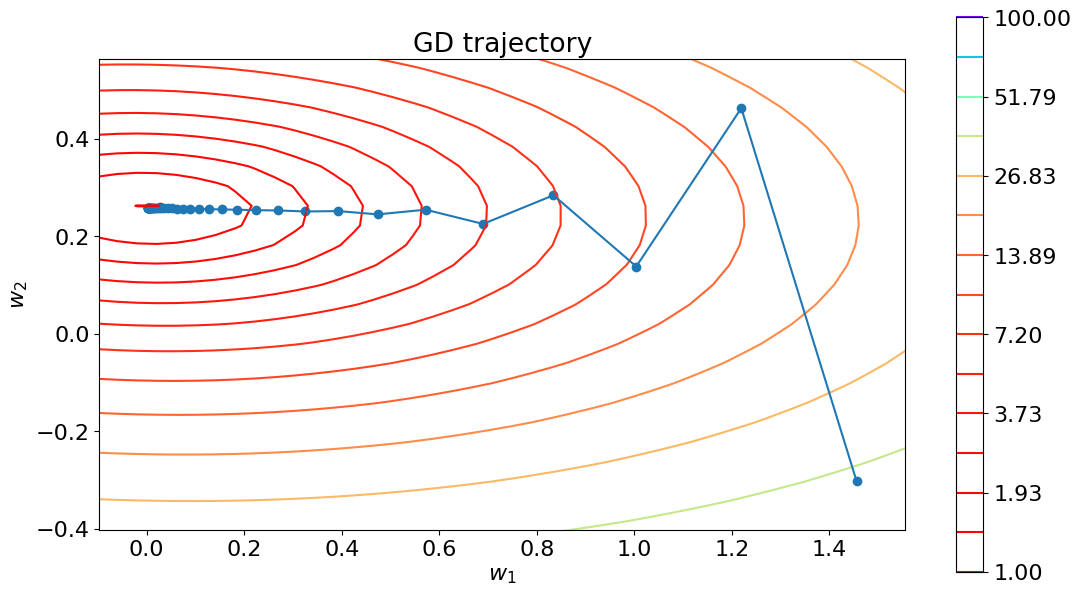

In [18]:
# compute level set
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))

plt.figure(figsize=(13, 9))
plt.title('GD trajectory')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=15), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

### Instability analysis
Using the new technique, let's analyse the linear regression behavior in case of multicollinear features.

In case of (multi-)collinear features the solution is *unstable*. Let's take a look at the *condition number* of our matrix:
$$\kappa(a) = \frac{\sigma_\max(A)}{\sigma_\min(A)}$$
where $\sigma _{\max }(A)$ and $\sigma _{\min }(A)$ are maximal and minimal singular values of matrix $A$ respectively. Hence 

In [19]:
def get_w_by_grad(X, Y, num_steps, w_0, lr):
    w = w_0.copy()

    for i in range(num_steps):
        w -= 2 * lr * np.dot(X.T, np.dot(X, w) - Y) / Y.shape[0]
    return w

def get_w_by_stoch_grad(X, Y, num_steps, w_0, lr_0, n_objects):
    w = w_0.copy()
    lr_0 = 0.45

    for i in range(num_steps):
        lr = lr_0 / ((i+1)**0.51)
        sample = np.random.randint(n_objects, size=batch_size)
        w -= 2 * lr * np.dot(X[sample].T, np.dot(X[sample], w) - Y[sample]) / Y.shape[0]
    return w

def rmse(y_true, y_pred):
    return np.linalg.norm(y_true-y_pred)

In [20]:
lr = 1e-3
sgd_lr = 0.1
num_steps = 250
noise_eps_seq = np.logspace(-2, -6, 20)

w_0 = np.random.uniform(-2, 2, (n_features))

In [21]:
condition_numbers = []
vector_norms_list = []
rmse_list = []
results_list = []
for eps in noise_eps_seq:
    local_condition_numbers = []
    local_vector_norms_list = []
    local_rmse_list = []
    for i in range(50):
        X[:, -1] = 2 * (X[:, -2] + np.random.uniform(-eps, eps, X[:, -2].shape))

        a = np.linalg.eigvals(X.T.dot(X))
        local_condition_numbers.append(a.max() / a.min())

        w_star = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
        w_star_grad = get_w_by_grad(X, Y, num_steps, w_0, lr)
        w_star_sgd = get_w_by_stoch_grad(X, Y, num_steps, w_0, sgd_lr, n_objects)
        local_vector_norms_list.append([
            np.linalg.norm(w_star),
            np.linalg.norm(w_star_grad), 
            np.linalg.norm(w_star_sgd),
        ])

        analytical_predict = X.dot(w_star)
        grad_predict = X.dot(w_star_grad)
        sgd_predict = X.dot(w_star_sgd)
        
        local_rmse_list.append([
            rmse(Y, analytical_predict),
            rmse(Y, grad_predict),
            rmse(Y, sgd_predict),
        ])
        
        results_list.append([w_star, w_star_grad, w_star_sgd])

    condition_numbers.append([np.mean(local_condition_numbers), np.std(local_condition_numbers)])
    vector_norms_list.append([
        np.mean(np.array(local_vector_norms_list), axis=0),
        np.std(np.array(local_vector_norms_list), axis=0),
    ])
    rmse_list.append(np.mean(np.array(local_rmse_list), axis=0))

condition_numbers = np.array(condition_numbers)
vector_norms_list = np.array(vector_norms_list)
rmse_list = np.array(rmse_list)

Take a close look on the collected vectors:

In [22]:
from utils_02 import visualise

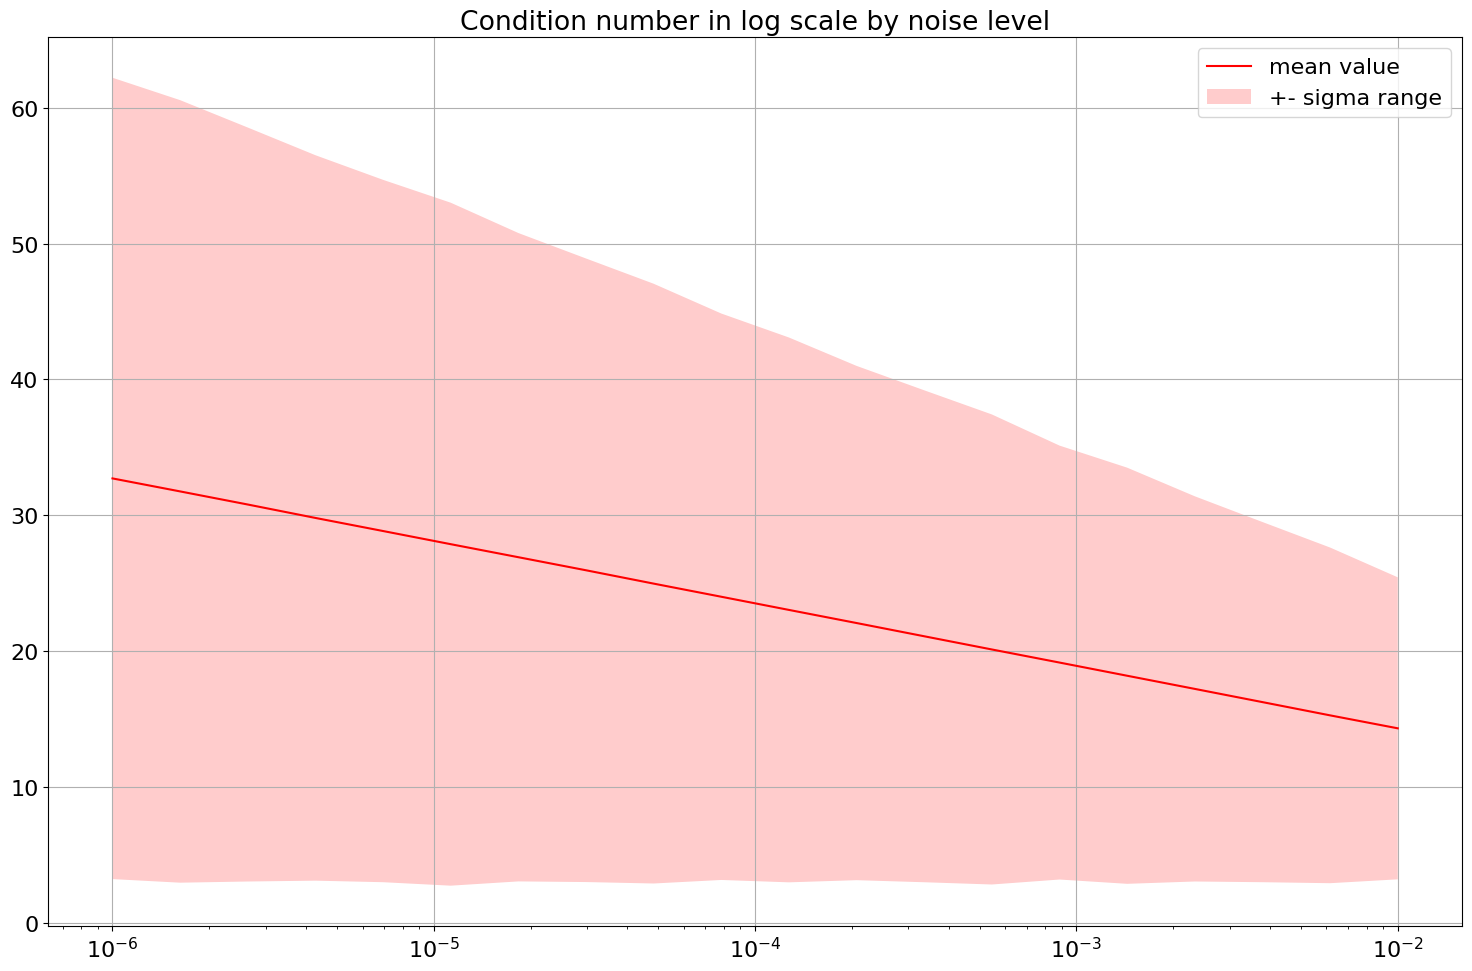

In [23]:
visualise(
    np.log(condition_numbers[:, 0]), 
    np.log(condition_numbers[:, 1]),
    noise_eps_seq, 
    title='Condition number in log scale by noise level',
    greater_than_zero=True,
    log_scale=True
)

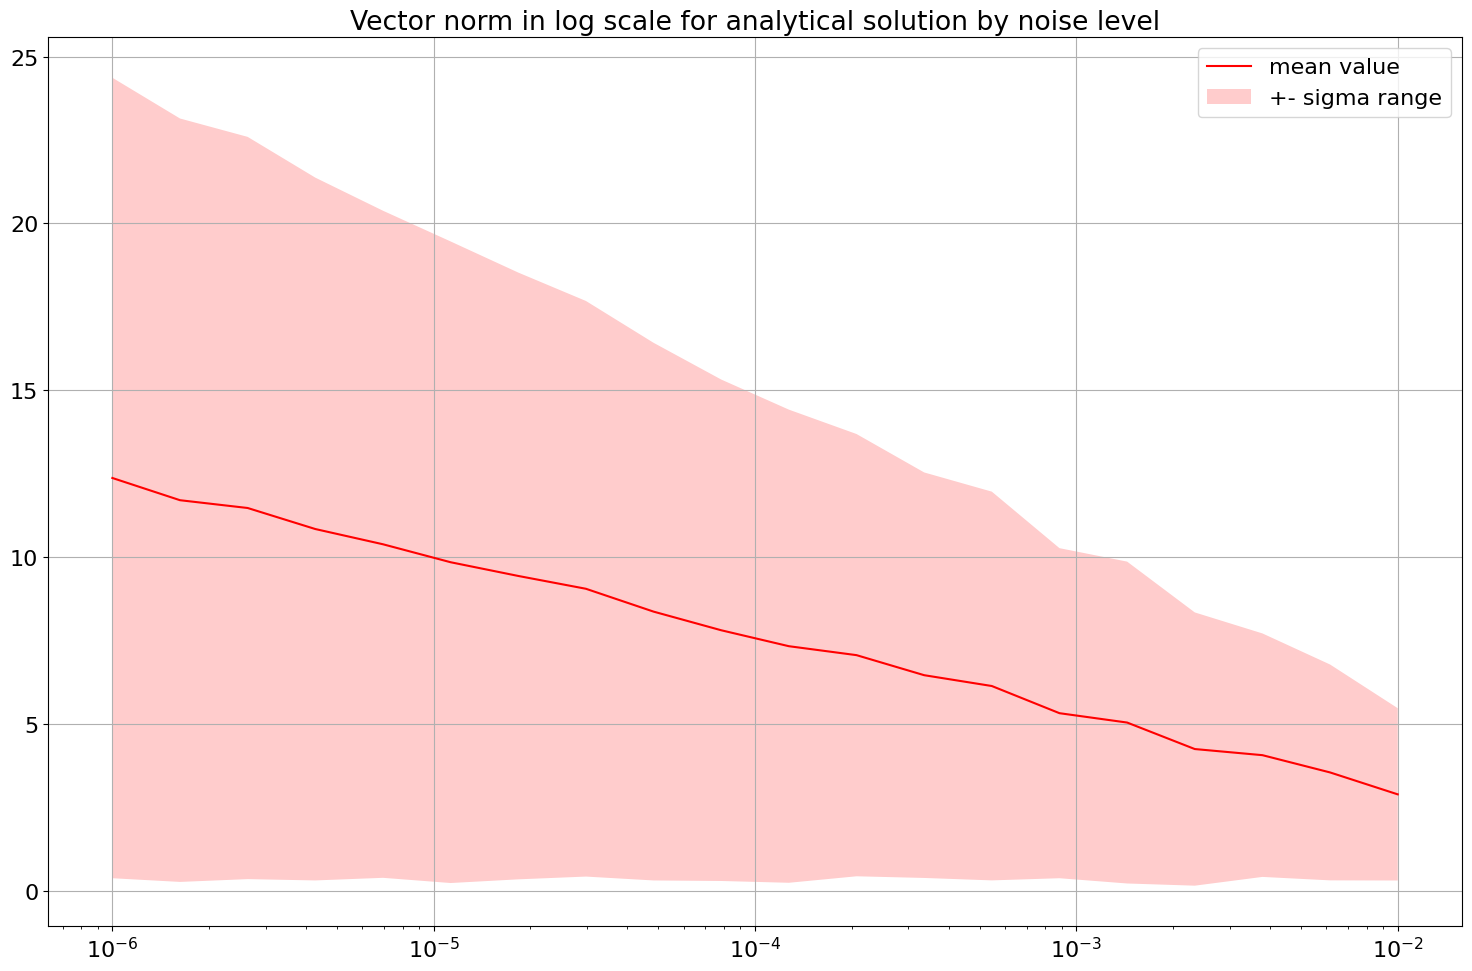

In [24]:
visualise(
    np.log(vector_norms_list[:, 0, 0]), 
    np.log(vector_norms_list[:, 1, 0]),
    noise_eps_seq, 
    title='Vector norm in log scale for analytical solution by noise level',
    greater_than_zero=True,
    log_scale=True
)

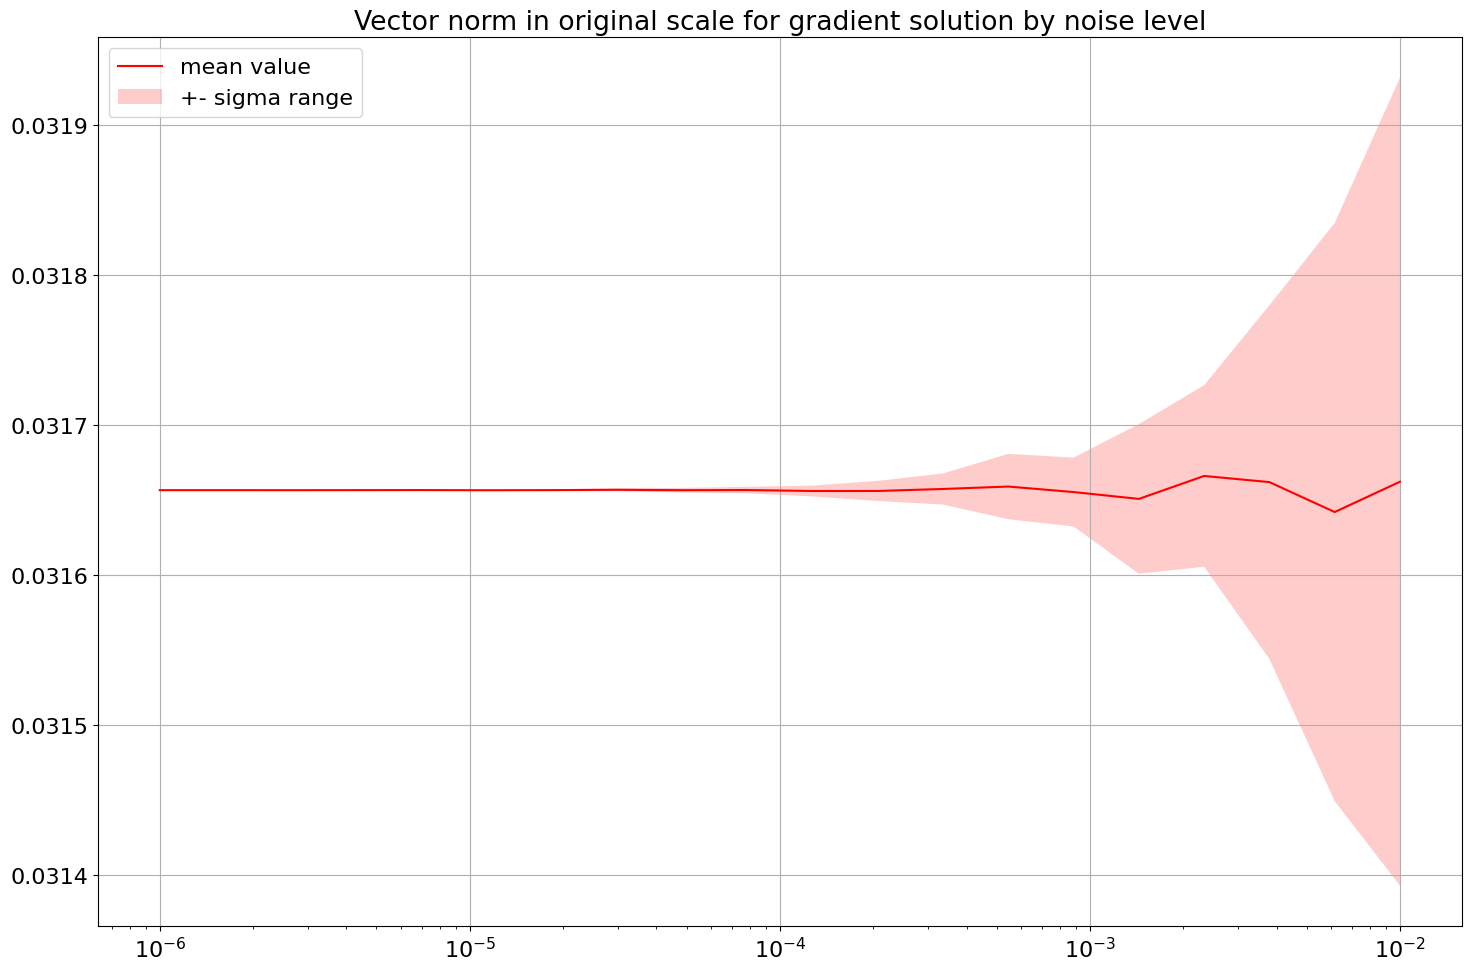

In [25]:
visualise(
    vector_norms_list[:, 0, 1], 
    vector_norms_list[:, 1, 1],
    noise_eps_seq, 
    title='Vector norm in original scale for gradient solution by noise level',
    greater_than_zero=True,
    log_scale=True
)

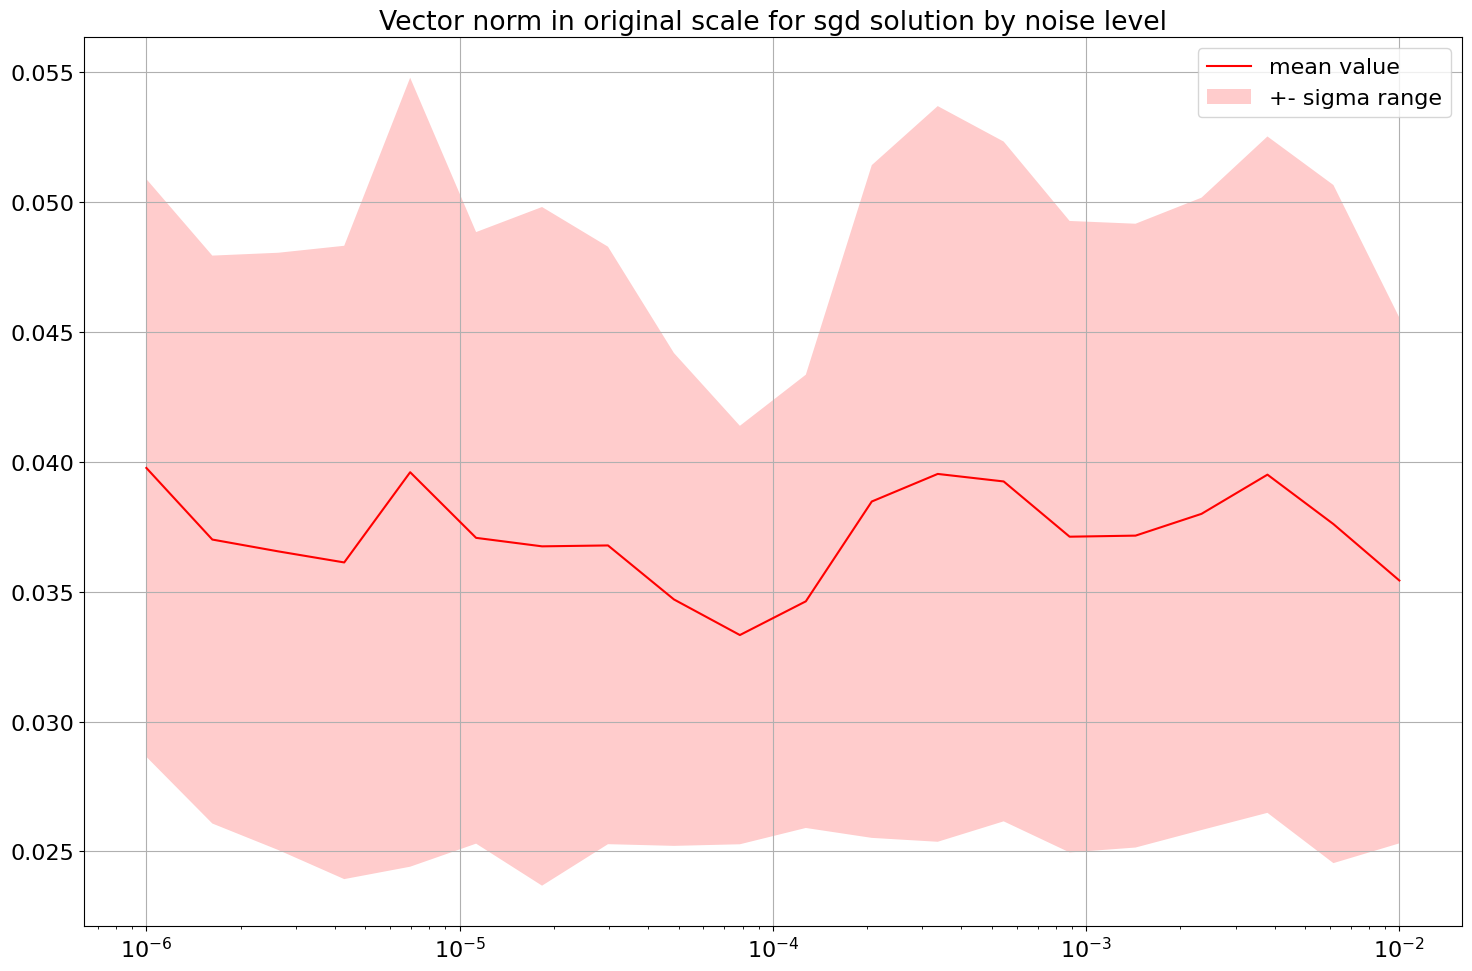

In [26]:
visualise(
    vector_norms_list[:, 0, 2], 
    vector_norms_list[:, 1, 2],
    noise_eps_seq, 
    title='Vector norm in original scale for sgd solution by noise level',
    greater_than_zero=True,
    log_scale=True
)

## Linear regression out of the box

Finally, let's take a brief look at implemented versions of Linear Regression from sklearn. The main classes are:

* [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) — classical linear regression (*actially, it is just `scipy.linalg.lstsq` wrapped with sklearn `Predictor` class) __analytical__ solver.
* [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) — Linear regression with L1 regularization.
* [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) — Linear regression with L2 regularization.

To minimize any other error function you are free to use [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) (or wait for a week and we will get the great *PyTorch* automatic differentiation engine).

Let's compare the speed of analytical and gradient solutions from the sklearn realizations.

IPython magic `%%time` wrapper will be used.

To measure the quality $R^2$ score will be used. It compares our model (`a`) with one always predicting mean `y`:

$$R^2 = 1 - \frac{\sum_i (y_i - a(x_i))^2}{\sum_i (y_i - \overline{y}_i)^2}$$

`LinearRegression` vs. `Ridge`: __Fight!__



In [27]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [28]:
n_features = 700
n_objects = 100000
num_steps = 150

w_true = np.random.uniform(-2, 2, (n_features, 1))

X = np.random.uniform(-100, 100, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 10, (n_objects, 1))

In [29]:
%%time

lr = LinearRegression()
lr.fit(X, Y)
print(f'R2: {lr.score(X, Y)}')

R2: 0.9999686991852469
CPU times: user 54.2 s, sys: 2.68 s, total: 56.9 s
Wall time: 6.14 s


In [30]:
%%time

lr = Ridge(alpha=0.0, solver='sparse_cg')
lr.fit(X, Y)
print(f'R2: {lr.score(X, Y)}')

R2: 0.9999686967175103
CPU times: user 4.3 s, sys: 2.3 s, total: 6.6 s
Wall time: 994 ms


## Own neat version of Linear Regression

Let's use `sklearn`'s standard interfaces to implement sealed version of our version of Linear Regression using SGD

First we need to inherit base classes, then implement 3 main stages of regressor life as methods:
* hyperparameter initialization - constructor
* parameters training on known objects - fit method
* target estimation for unknown objects - predict method

In [31]:
from sklearn.base import BaseEstimator, RegressorMixin
# also ClassifierMixin and TransformerMixin exist

In [32]:
class LinearRergessionSGD(BaseEstimator, RegressorMixin):
    '''LinearRergession with L2 regularization and SGD optimizer
    '''
    def __init__(
        self, C: float=1.0,
        batch_size: int=25,
        lr: float=1e-2,
        num_steps: int=200,
    ) -> None:
        self.C = C
        self.batch_size = batch_size
        self.lr = lr
        self.num_steps = num_steps

    def fit(self, X, Y):
        w = np.random.randn(X.shape[1])[:, None]
        n_objects = len(X)

        # this is just copied from above
        for i in range(self.num_steps):
            sample_indices = np.random.randint(n_objects, size=self.batch_size)
            w -= 2 * self.lr * np.dot(X[sample_indices].T, np.dot(X[sample_indices], w) - Y[sample_indices]) / self.batch_size

        self.w = w
        return self

    def predict(self, X):
        return X@self.w

Let's generate dataset with differently scaled features

In [33]:
n_features = 700
n_objects = 100000
num_steps = 150

w_true = np.random.uniform(-2, 2, (n_features, 1))

X = np.random.uniform(-100, 100, (n_objects, n_features)) * np.arange(n_features)
Y = X.dot(w_true) + np.random.normal(0, 10, (n_objects, 1))

and split it to train and test

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

Now let's test our solution

In [36]:
own_lr = LinearRergessionSGD().fit(x_train, y_train)
print(f'R2: {own_lr.score(x_test, y_test)}')

ValueError: Input contains NaN.

OOOOOOOOOPS!!!

Something went wrong. What could it be?

During our SGD we've encountered too big values to store in float.

That leads us to feature normalization.
Lest's scale features: just subtract mean from each feature and divide by sample variation

In [37]:
x_scaled_by_hands = (x_train - x_train.mean(axis=0, keepdims=True)) / (x_train.std(axis=0, keepdims=True) + 1e-5)

In [38]:
np.allclose(x_scaled, x_scaled_by_hands, atol=1e-5)

NameError: name 'x_scaled' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_scaled = scaler.transform(x_train)

In [ ]:
own_lr = LinearRergessionSGD().fit(x_scaled, y_train)

But for test we need to scale test features

In [ ]:
x_test_scaled = scaler.transform(x_test)

In [ ]:
print(f'R2: {own_lr.score(x_test_scaled, y_test)}')

Wow! we didn't implement no `score` method. But `sklearn`'s base class provide us it aleready implemented.

You note that scaling data before prediction is not a big pleasure. So we could get rid of this bulkiness with pipelines

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
pipe = make_pipeline(
    StandardScaler(),
    LinearRergessionSGD(),
)

In [ ]:
pipe.fit(x_train, y_train)
print(f'R2: {pipe.score(x_test, y_test)}')

As if we don't have any complex assembly behind pipeline interface!

And no data leak guaranteed as a gift!